In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("Amazon Sales data.csv")

In [4]:
data.head

<bound method NDFrame.head of                                Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household  

In [5]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [6]:
data.info

<bound method DataFrame.info of                                Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household

In [10]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [13]:
duplicate = data.duplicated().sum()
print(duplicate)
if duplicate == 0:
    print("No duplicate Data")
else:
    pass

0
No duplicate Data


In [16]:
data["Country"].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [17]:
data["Item Type"].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

C:\Users\softsensor.ai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


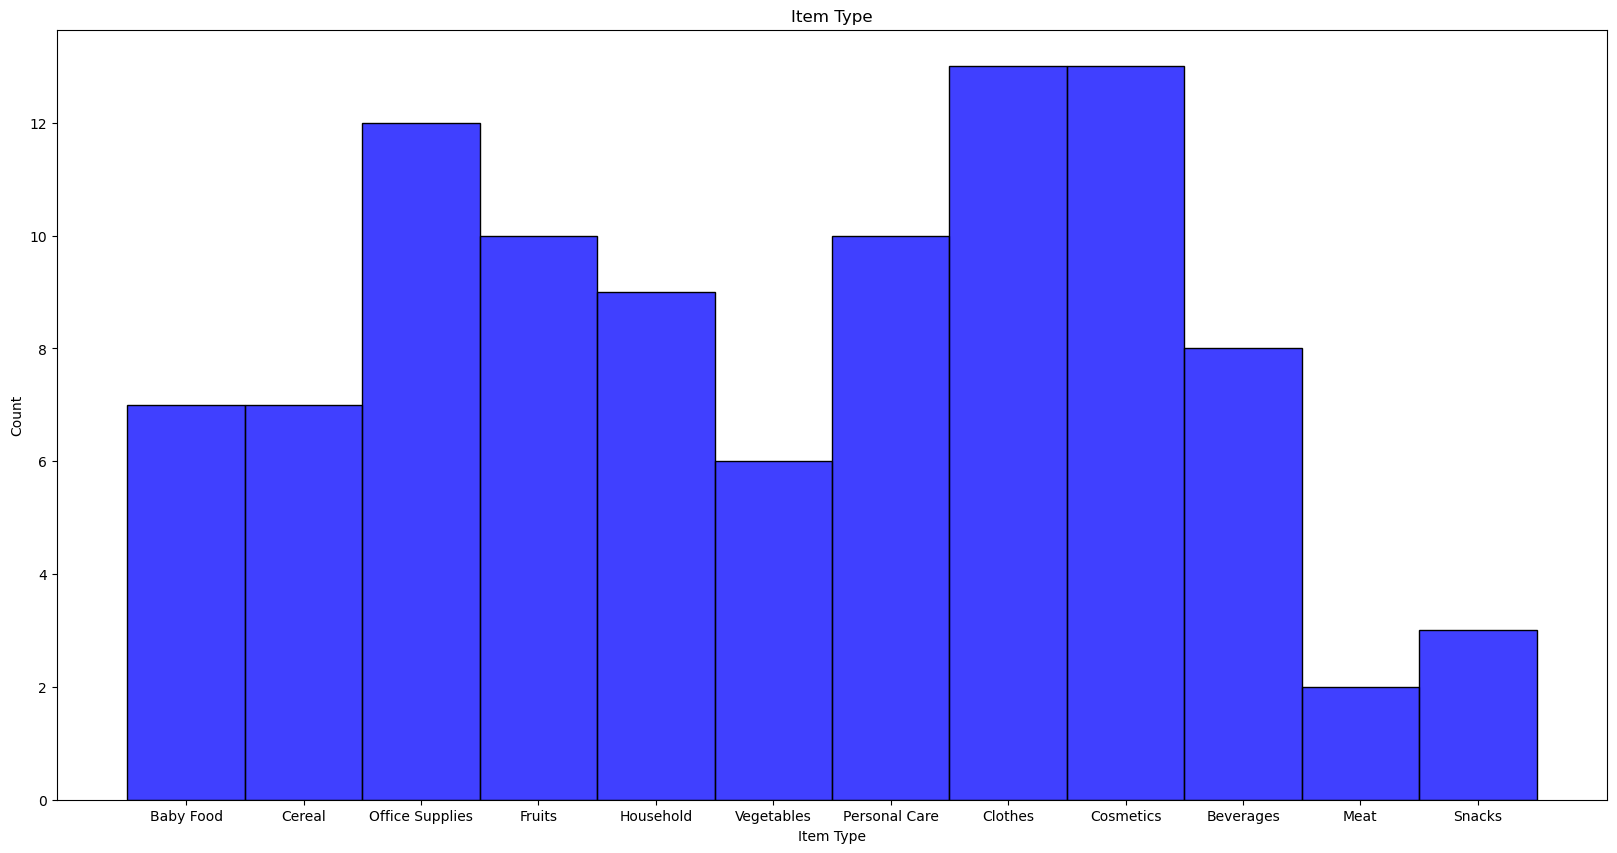

In [22]:
plt.figure(figsize = (20,10))
sns.histplot(x = "Item Type" ,data = data , color= "Blue")
plt.title("Item Type")
plt.grid(False)
plt.show()

In [25]:
data['Order Date']= pd.to_datetime(data['Order Date'])
data['Ship Date']= pd.to_datetime(data['Ship Date'])
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [26]:
data[['Order Month', 'Order Year']]

,Order Month,Order Year
0,5,2010
1,8,2012
2,5,2014
3,6,2014
4,2,2013
...,...,...
95,7,2011
96,11,2011
97,6,2016
98,7,2015


In [27]:
monthly_sales = data.groupby('Order Month').agg({'Total Revenue': 'sum'}).reset_index()
print(monthly_sales)

    Order Month  Total Revenue
0             1    10482467.12
1             2    24740517.77
2             3     2274823.87
3             4    16187186.33
4             5    13215739.99
5             6     5230325.77
6             7    15669518.50
7             8     1128164.91
8             9     5314762.56
9            10    15287576.61
10           11    20568222.76
11           12     7249462.12


In [28]:
yearly_sales = data.groupby('Order Year').agg({'Total Revenue': 'sum'}).reset_index()
print(yearly_sales)

   Order Year  Total Revenue
0        2010    19186024.92
1        2011    11129166.07
2        2012    31898644.52
3        2013    20330448.66
4        2014    16630214.43
5        2015    12427982.86
6        2016    12372867.22
7        2017    13373419.63


In [29]:
yearly_monthly_sales = data.groupby(['Order Year', 'Order Month']).agg({'Total Revenue': 'sum'}).reset_index()
print(yearly_monthly_sales)

    Order Year  Order Month  Total Revenue
0         2010            2     3410661.12
1         2010            5     2587973.26
2         2010            6     1082418.40
3         2010           10     6064933.75
4         2010           11     3458252.00
5         2010           12     2581786.39
6         2011            1     1042225.35
7         2011            2      387002.20
8         2011            4     2798046.49
9         2011            5      272410.45
10        2011            6       19103.44
11        2011            7       97040.64
12        2011            9      574951.92
13        2011           11     5938385.58
14        2012            1     1012884.00
15        2012            2     6707849.42
16        2012            3      994765.42
17        2012            4     4556012.38
18        2012            5     3782781.82
19        2012            6     2132075.27
20        2012            7     4445093.92
21        2012            8      576782.80
22        2

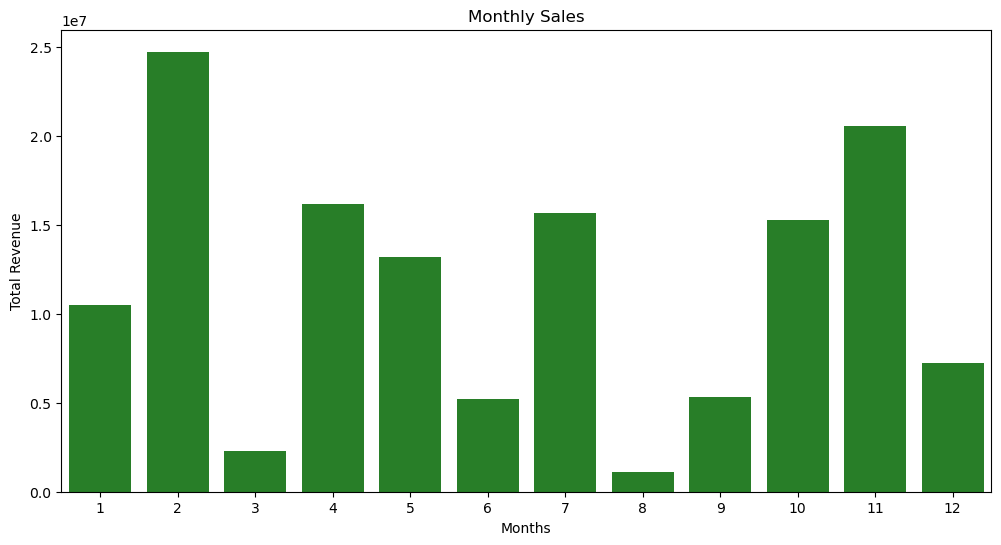

In [31]:
plt.figure(figsize=(12,6))

sns.barplot(data=monthly_sales, x= 'Order Month', y= 'Total Revenue', color='green', alpha = 0.9)

plt.title("Monthly Sales")
plt.xlabel("Months")
plt.ylabel("Total Revenue")

plt.show()

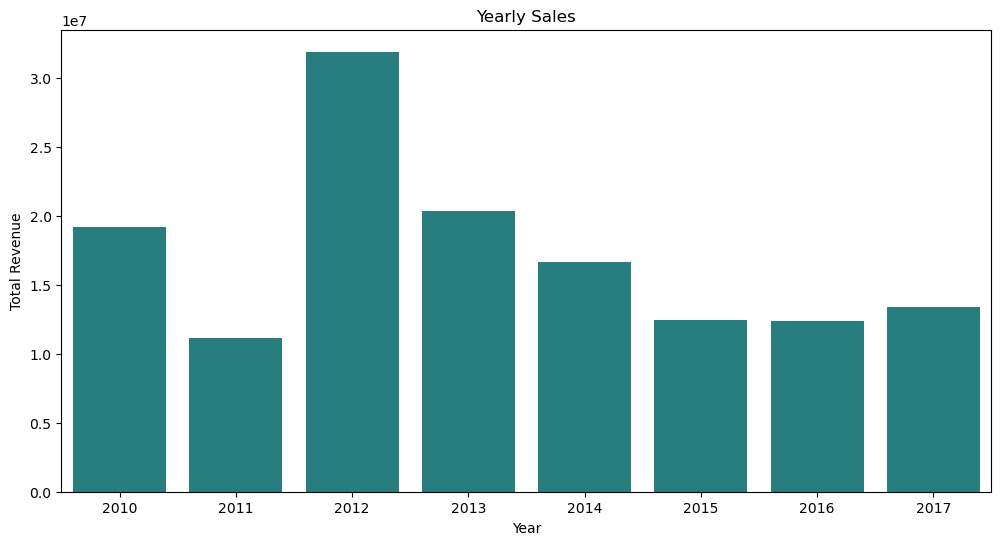

In [32]:
plt.figure(figsize=(12,6))

sns.barplot(data=yearly_sales, x= 'Order Year', y= 'Total Revenue', color='Teal', alpha = 0.9)

plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Revenue")

plt.show()

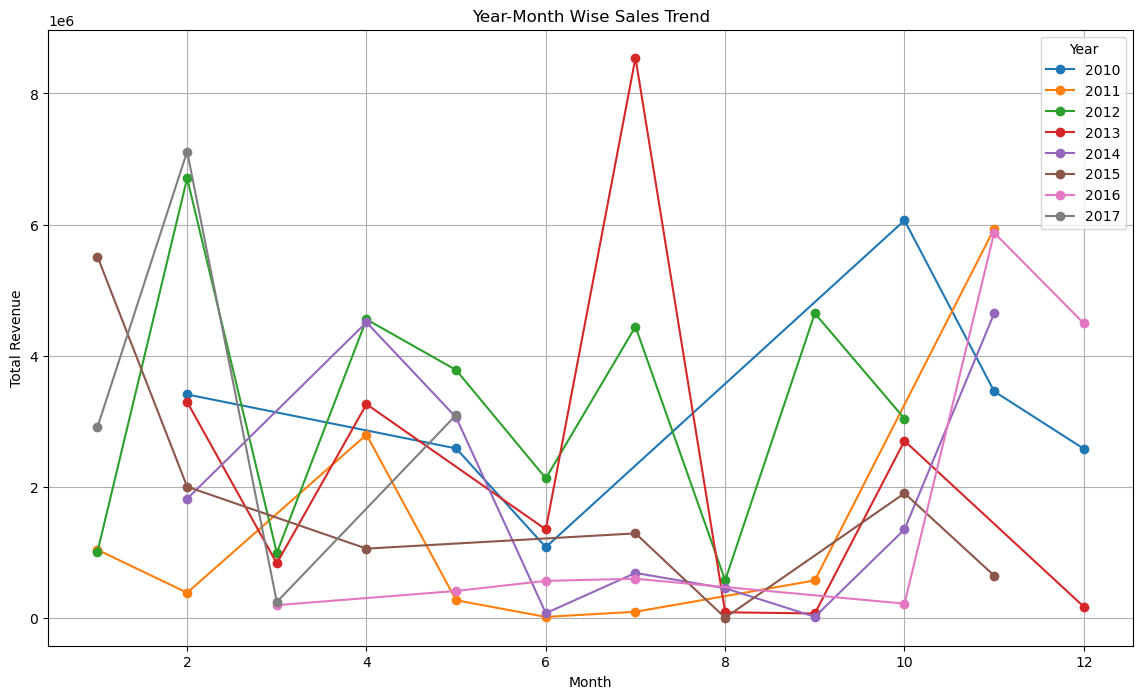

In [33]:
plt.figure(figsize=(14, 8))

for year in yearly_monthly_sales['Order Year'].unique():
    monthly_data = yearly_monthly_sales[yearly_monthly_sales['Order Year'] == year]
    plt.plot(monthly_data['Order Month'], monthly_data['Total Revenue'], marker='o', label=str(year))

plt.title('Year-Month Wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title= 'Year')
plt.grid(True)
plt.show()

In [34]:
revenue = data['Total Revenue'].sum()
cost = data['Total Cost'].sum()
profit = data['Total Profit'].sum()

print(f"Total Revenue : $ {round(revenue,2)}")
print(f"Total Cost : $ {round(cost,2)}")
print(f"Total Profit : $ {round(profit,2)}")

Total Revenue : $ 137348768.31
Total Cost : $ 93180569.91
Total Profit : $ 44168198.4


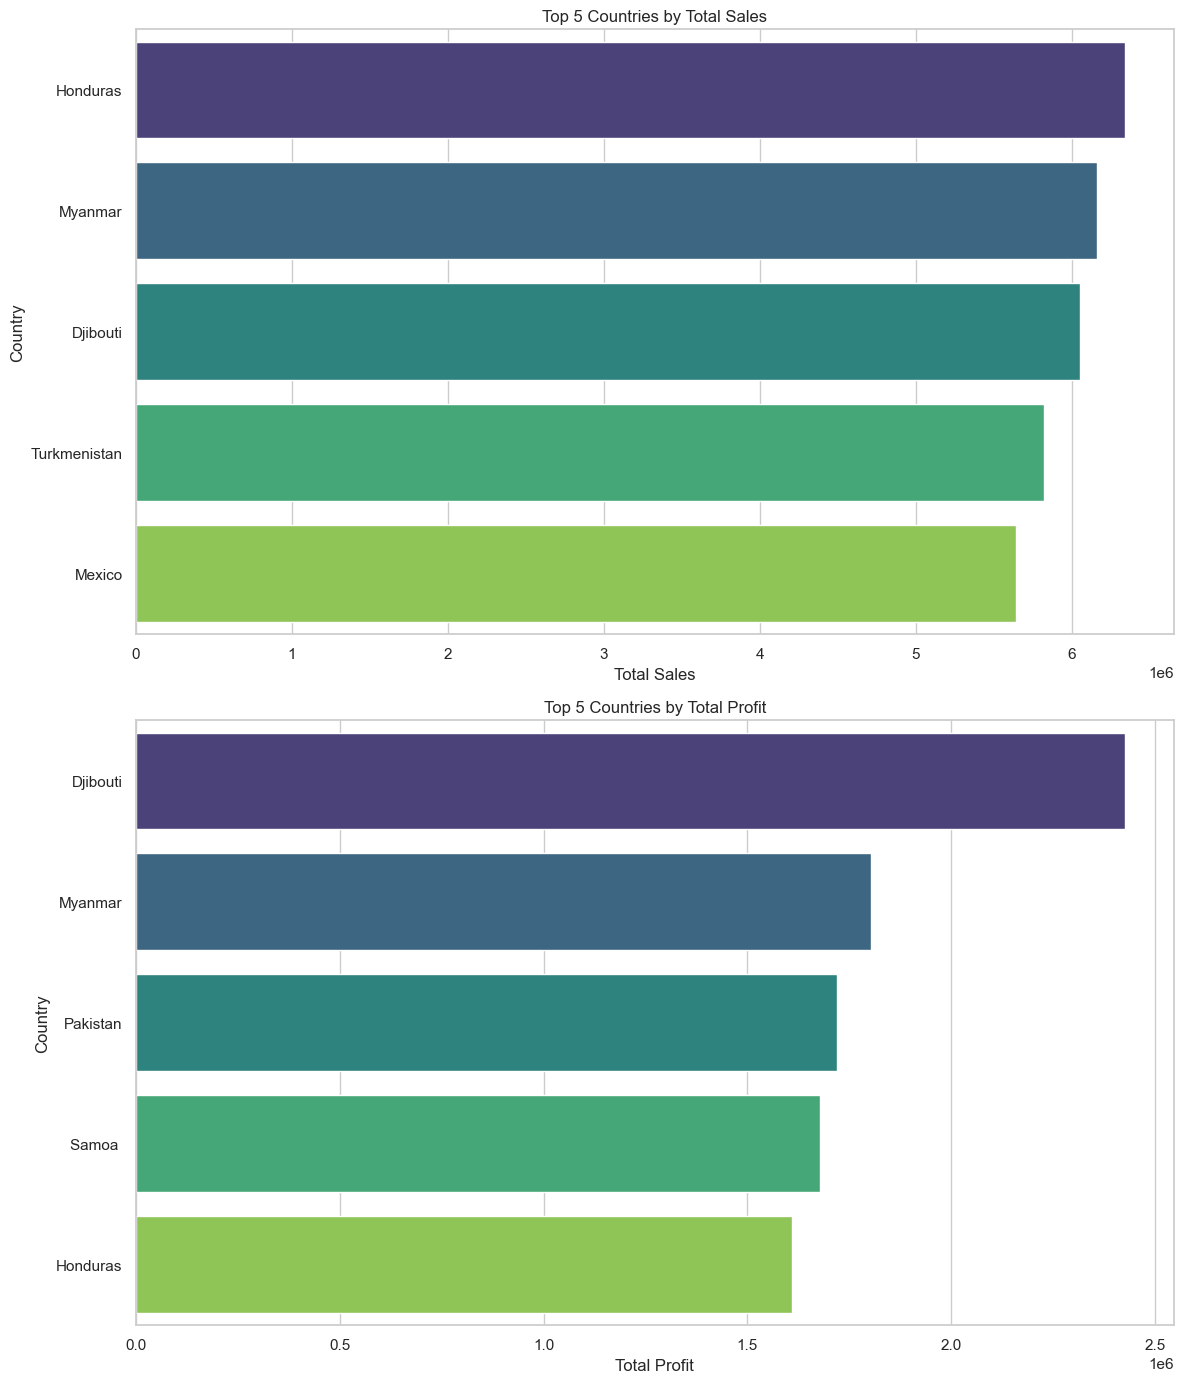

In [41]:
country_sales_profit = data.groupby('Country').agg({'Total Revenue': 'sum', 'Total Profit': 'sum'}).reset_index()


top5_sales_countries = country_sales_profit.nlargest(5, 'Total Revenue')
top5_profit_countries = country_sales_profit.nlargest(5, 'Total Profit')

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(12, 14))

sns.barplot(x='Total Revenue', y='Country', data=top5_sales_countries, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Countries by Total Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Country')

sns.barplot(x='Total Profit', y='Country', data=top5_profit_countries, ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 Countries by Total Profit')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('Country')

plt.tight_layout()

plt.show()
